In [80]:
!pip install numpy
import numpy as np
print(np.__version__)

2.3.1


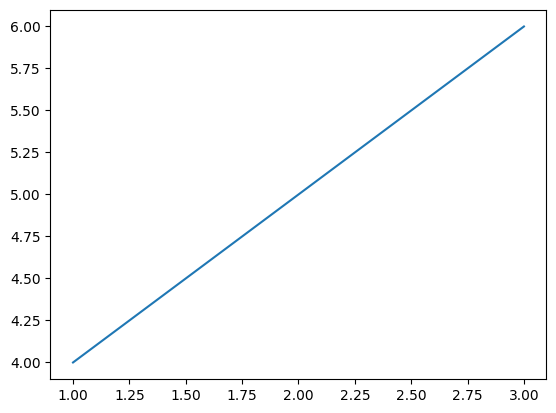

In [81]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [83]:

def find_closest_centroids(X, centroids):

    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)
    
    return idx

In [84]:
def compute_centroids(X, idx, K):  

    m, n = X.shape

    centroids = np.zeros((K, n))
    
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)
    
    return centroids

In [85]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
       
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [86]:
def kMeans_init_centroids(X, K):
    
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:K]]
    return centroids

In [87]:
original_img = plt.imread('butterfly.png')

In [88]:
if original_img.shape[2] == 4:
    original_img = original_img[:, :, :3]

In [89]:
from PIL import Image

img = Image.open('butterfly.png').convert('RGB')
img = img.resize((128, 128))  
original_img = np.array(img) / 255.0

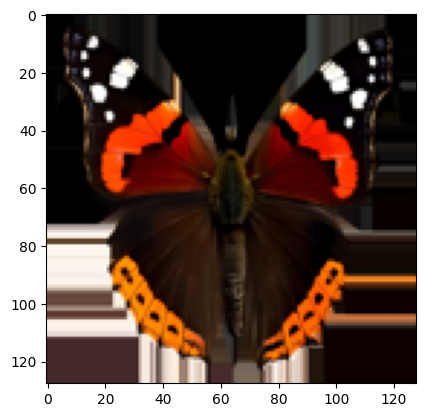

In [90]:
plt.imshow(original_img)

In [91]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [92]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [93]:
K = 7
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [94]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [0 0 0 0 0]


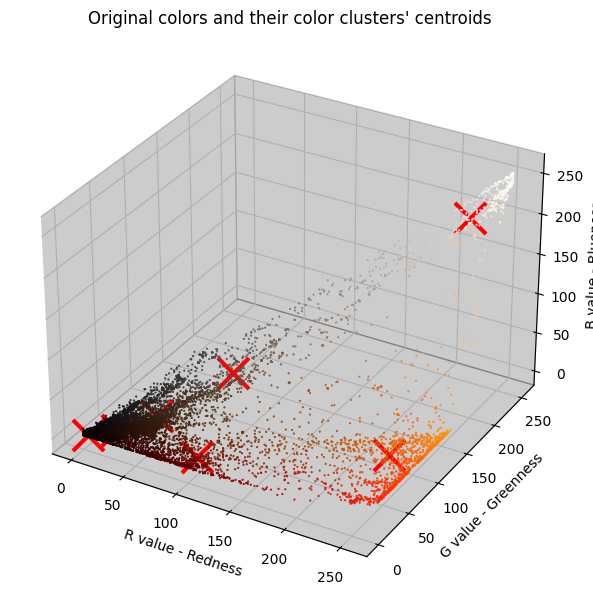

In [95]:
plot_kMeans_RGB(X_img, centroids, idx, K)

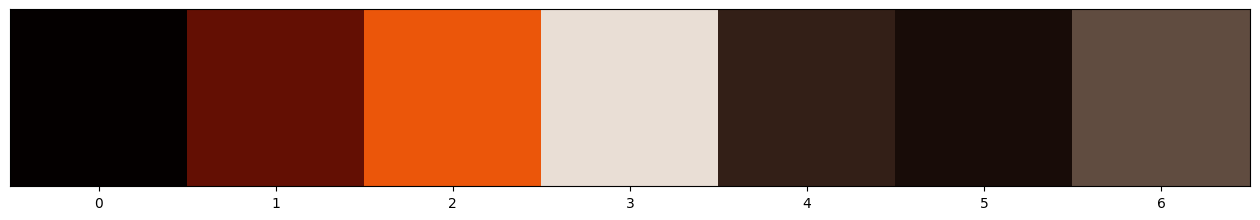

In [97]:
show_centroid_colors(centroids)

In [98]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :] 

X_recovered = np.reshape(X_recovered, original_img.shape) 

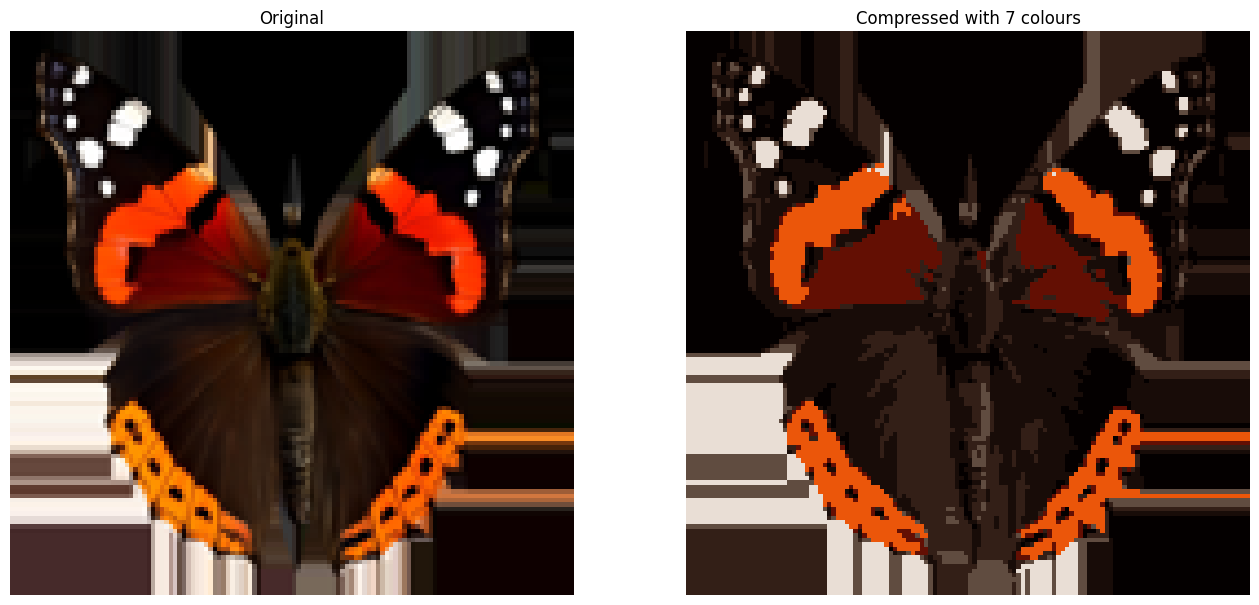

In [99]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()